# 一様分布の性質

In [2]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
set_plot_params()
name = Path().cwd().name + "/uniform"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


# PDF

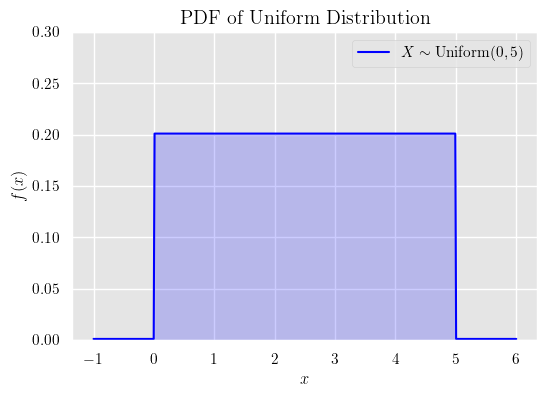

In [41]:
# 区間 [a, b]
a, b = 0, 5

# x の範囲
x = np.linspace(-1, 6, 500)

# 一様分布の確率密度関数
pdf = np.where((x >= a) & (x <= b), 1/(b-a), 0)

# plot
plt.figure(figsize=(6,4))
plt.plot(x, pdf+0.001, label=rf"$X \sim \mathrm{{Uniform}}({a},{b})$", color="blue")
plt.fill_between(x, pdf, alpha=0.2, color="blue")

plt.title("PDF of Uniform Distribution")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.ylim(0, 0.3)
plt.legend()
plt.grid(True)
plt.savefig(save_dir.joinpath("pdf.png"), dpi=300)
plt.show()


In [6]:
from matplotlib.animation import FuncAnimation, PillowWriter

# 描画範囲
x = np.linspace(-1, 10, 500)

fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot([], [], color="blue")
fill = None
ax.set_ylim(0, 1.2)
ax.set_xlim(-1, 10)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.set_title("PDF of Uniform Distribution")

def init():
    line.set_data([], [])
    return line,

def update(frame):
    global fill
    if fill:  # 前の塗りつぶしを消す
        fill.remove()
    a, b = 0, frame
    pdf = np.where((x >= a) & (x <= b), 1/(b-a), 0)
    line.set_data(x, pdf)
    # fill = ax.fill_between(x, pdf, alpha=0.3, color="blue")
    ax.set_title(rf"$X \sim \mathrm{{Uniform}}({a},{b:.1f})$")
    return line, fill

ani = FuncAnimation(fig, update, frames=np.linspace(1, 9, 40),
                    init_func=init, blit=False, interval=200)

# GIFに保存
ani.save(save_dir.joinpath("pdf.gif"), writer=PillowWriter(fps=5))
plt.close()

# CDF

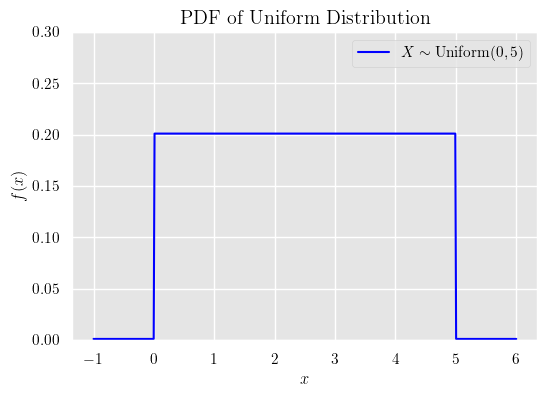

In [3]:
# 区間 [a, b]
a, b = 0, 5

# x の範囲
x = np.linspace(-1, 6, 500)

# 一様分布の確率密度関数
pdf = np.where((x >= a) & (x <= b), 1/(b-a), 0)

# plot
plt.figure(figsize=(6,4))
plt.plot(x, pdf+0.001, label=rf"$X \sim \mathrm{{Uniform}}({a},{b})$", color="blue")
# plt.fill_between(x, pdf, alpha=0.2, color="blue")

plt.title("PDF of Uniform Distribution")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.ylim(0, 0.3)
plt.legend()
plt.grid(True)
plt.savefig(save_dir.joinpath("pdf.png"), dpi=300)
plt.show()


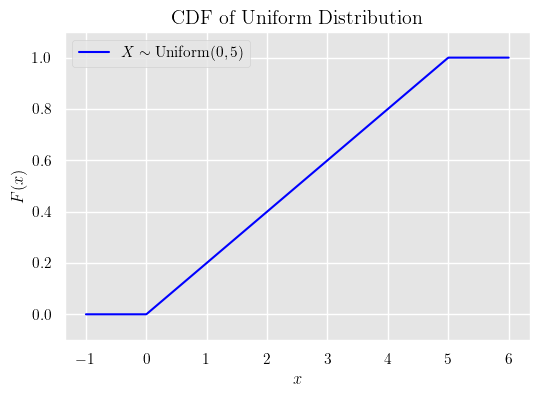

In [5]:
# 区間 [a, b]
a, b = 0, 5

# x の範囲
x = np.linspace(-1, 6, 500)

# 一様分布の累積分布関数
cdf = np.piecewise(
    x,
    [x < a, (a <= x) & (x <= b), x > b],
    [0, lambda x: (x - a) / (b - a), 1],
)

# plot
plt.figure(figsize=(6, 4))
plt.plot(x, cdf, label=rf"$X \sim \mathrm{{Uniform}}({a},{b})$", color="blue")
# plt.fill_between(x, 0, cdf, alpha=0.2, color="blue")

plt.title("CDF of Uniform Distribution")
plt.xlabel(r"$x$")
plt.ylabel(r"$F(x)$")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.savefig(save_dir.joinpath("cdf.png"), dpi=300)
plt.show()